Quelles ont été les tendances sur le marché du jeu vidéo ?

In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

vgsales = pd.read_csv('vgsales.csv'); vgsales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

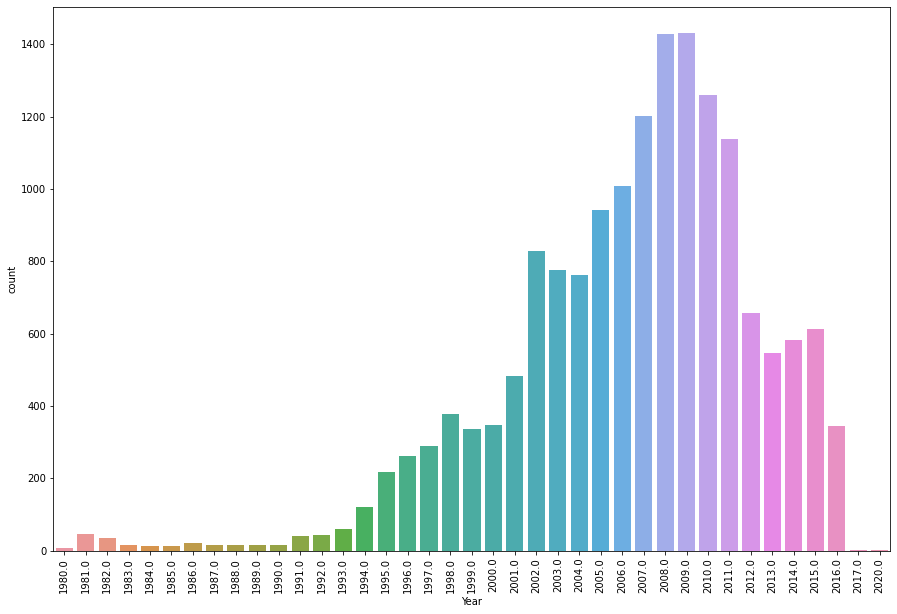

In [3]:
plt.figure(figsize=(15, 10))
sb.countplot(x="Year", data=vgsales)
plt.xticks(rotation=90)

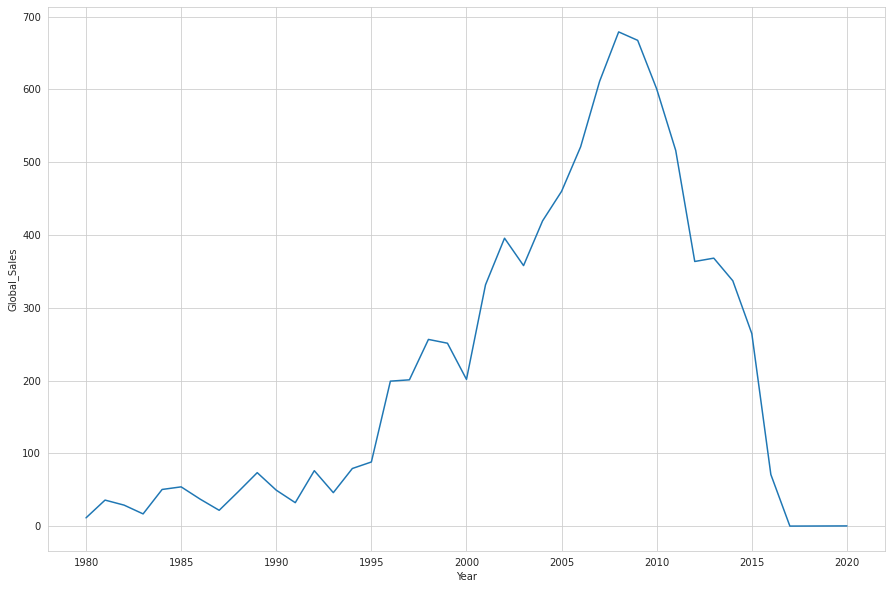

In [34]:
data_year = vgsales.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

plt.figure(figsize=(15, 10))
sb.lineplot(x="Year", y="Global_Sales", data=data_year)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

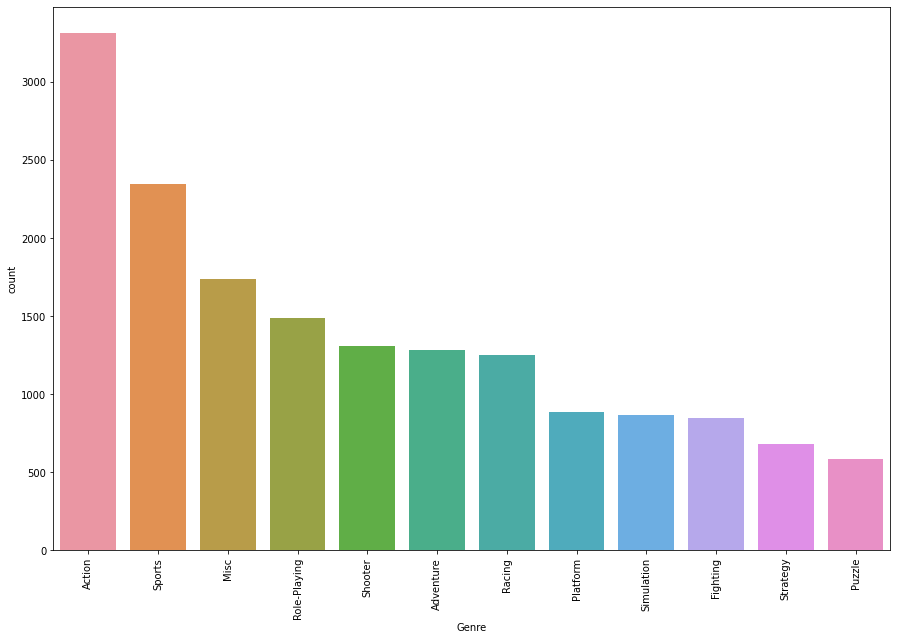

In [ ]:
plt.figure(figsize=(15, 10))
sb.countplot(x="Genre", data=vgsales, order = vgsales['Genre'].value_counts().index)
plt.xticks(rotation=90)

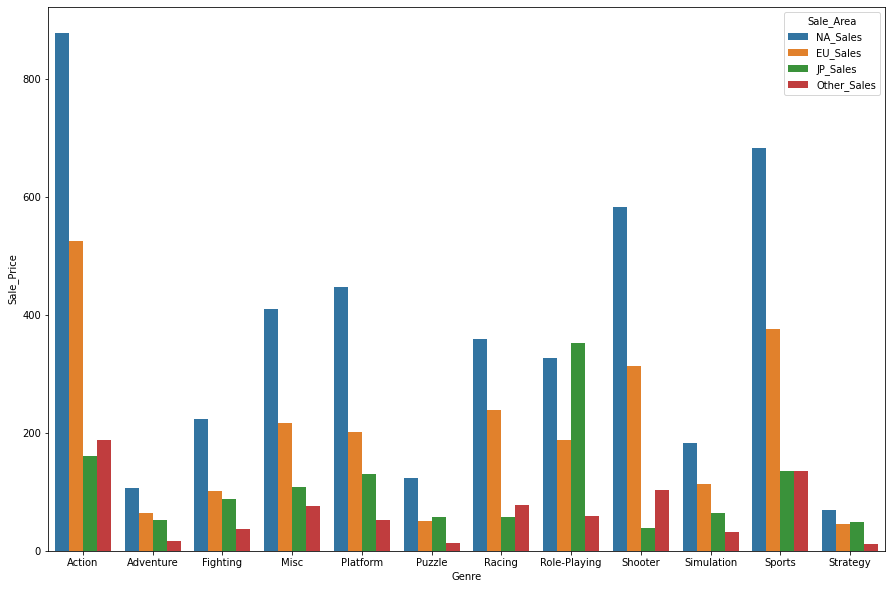

In [17]:
comp_genre = vgsales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = comp_genre.groupby(by=['Genre']).sum()


comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()
plt.figure(figsize=(15, 10))
sb.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

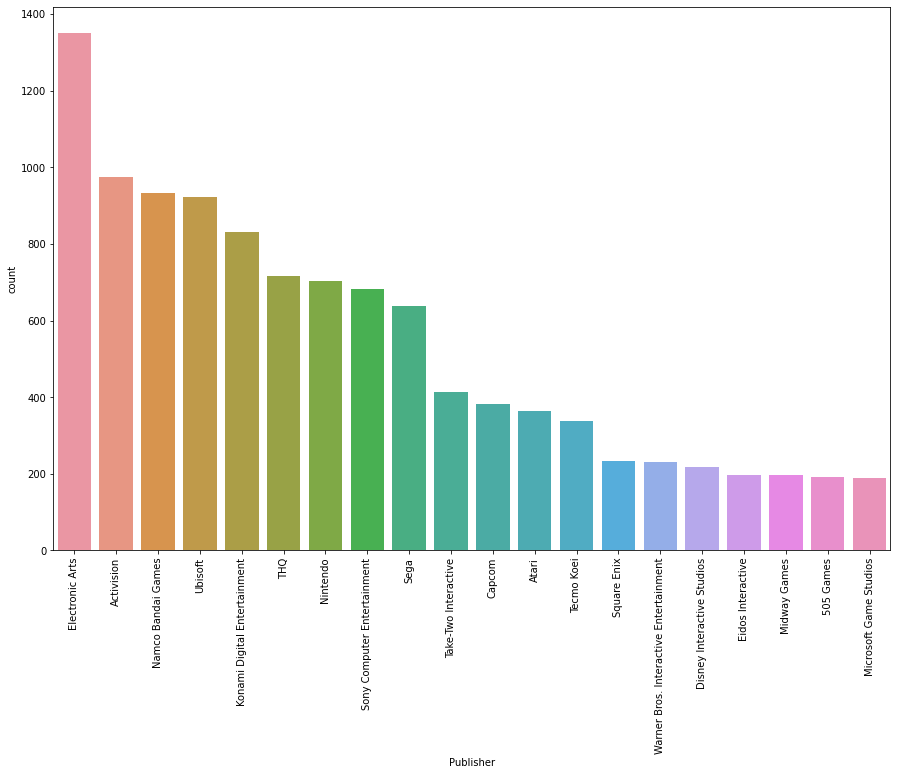

In [ ]:
top_publisher = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

plt.figure(figsize=(15, 10))
sb.countplot(x="Publisher", data=vgsales, order = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

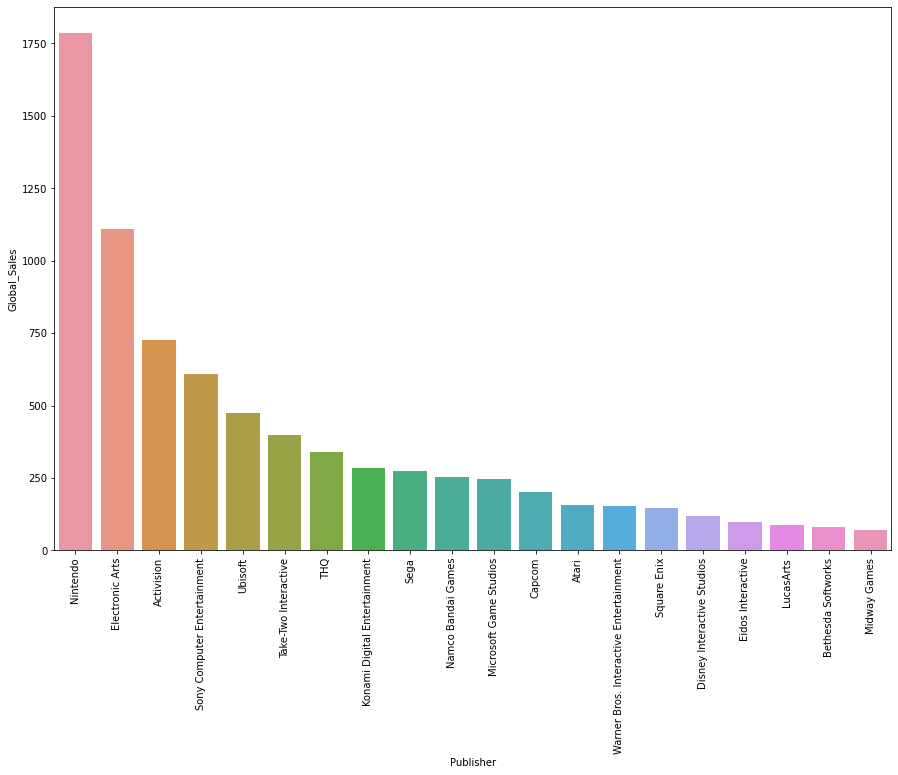

In [19]:
sale_pbl = vgsales[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

plt.figure(figsize=(15, 10))
sb.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

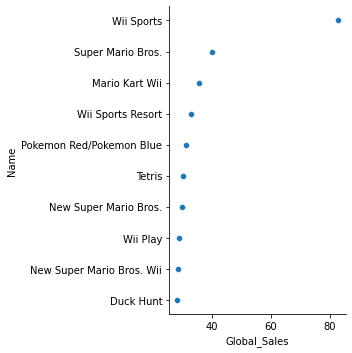

In [20]:
top10=vgsales.head(10)
sb.relplot(data=top10, x="Global_Sales", y="Name")

Conclusion: 
- Nintendo au top
- Jeux Gratuit
- Abonnement